# House Prices: Neural Networks

The objective of this notebook is to train a neural network model to predict [house prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview). 

# Preliminaries

In [1]:
# Import packages.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, ensemble, model_selection, tree
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape,test.shape

((1460, 81), (1459, 80))

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Prepocessing

In [6]:
# Fill null value
full_df = pd.concat([train.assign(is_train = 1),test.assign(is_train = 0)])
full_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,0


In [7]:
null_list=full_df.isnull().sum()
del null_list["SalePrice"]
sorted_list=null_list[null_list>0].sort_values()

<AxesSubplot:>

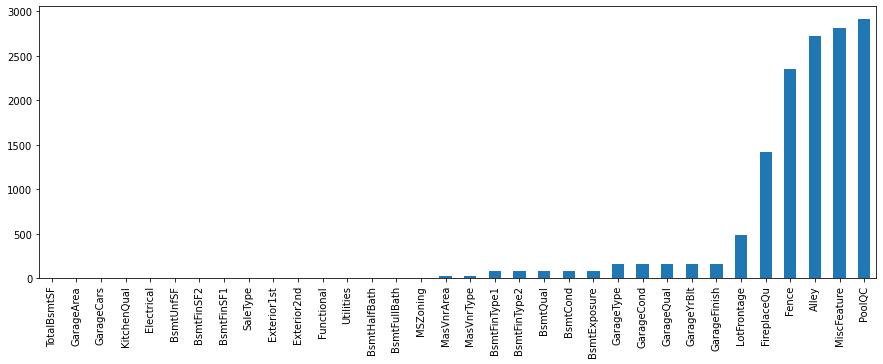

In [8]:
sorted_list.plot.bar(grid = False,figsize=(15, 5))

In [9]:
for col in full_df.drop(columns=['Id', 'SalePrice']):
    if full_df[col].dtype=="object":
        full_df[col]=train[col].fillna('NA')
    if full_df[col].dtype=="float64":
        full_df[col]=train[col].fillna(0)

In [10]:
# Define feature types.
target = ['SalePrice']
cat_feats = full_df.drop(columns=['Id', 'SalePrice','is_train']).select_dtypes(include='object').columns.tolist()
cont_feats = full_df.drop(columns=['Id', 'SalePrice','is_train']).select_dtypes(include=np.number).columns.tolist()
all_feats = cat_feats + cont_feats
len(full_df.columns), len(cat_feats), len(cont_feats)

(82, 43, 36)

# Numerical features

In [11]:
full_df[cont_feats].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,57.617335,10168.114080,6.089072,5.564577,1971.312778,1984.264474,103.152449,443.507366,46.465913,...,473.047619,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,34.662811,7886.996359,1.409947,1.113131,30.291442,20.894344,180.721288,456.041988,161.256285,...,213.773732,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,42.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,63.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,383.000000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,79.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.500000,712.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


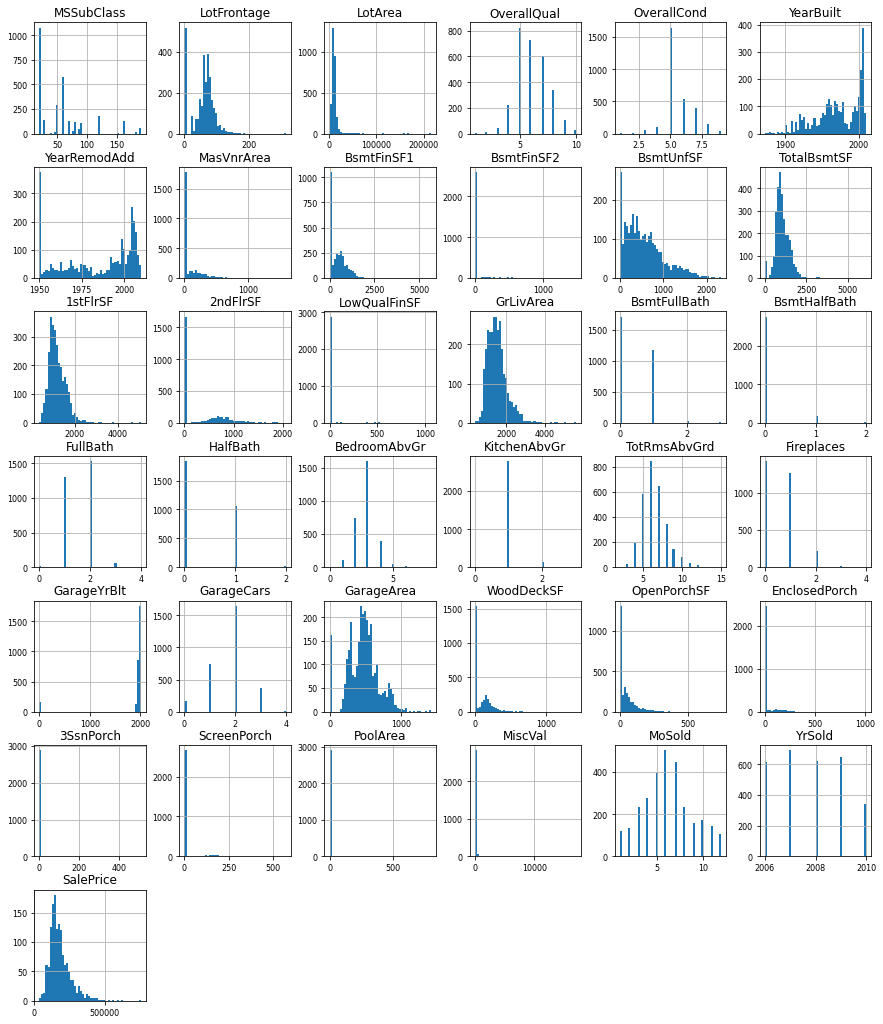

In [12]:
fig_ = full_df.drop(columns=['Id',"is_train"]).hist(figsize=(15, 18), bins=50, xlabelsize=8, ylabelsize=8)

In [13]:
corr_list=(train.drop(columns=['Id']).corr())["SalePrice"].sort_values(ascending=False)
corr_list=corr_list[corr_list>0.3]
# columns_to_drop = list(set(cont_feats).difference(set(corr_list.index)))
# full_df.drop(columns_to_drop, axis=1, inplace=True)

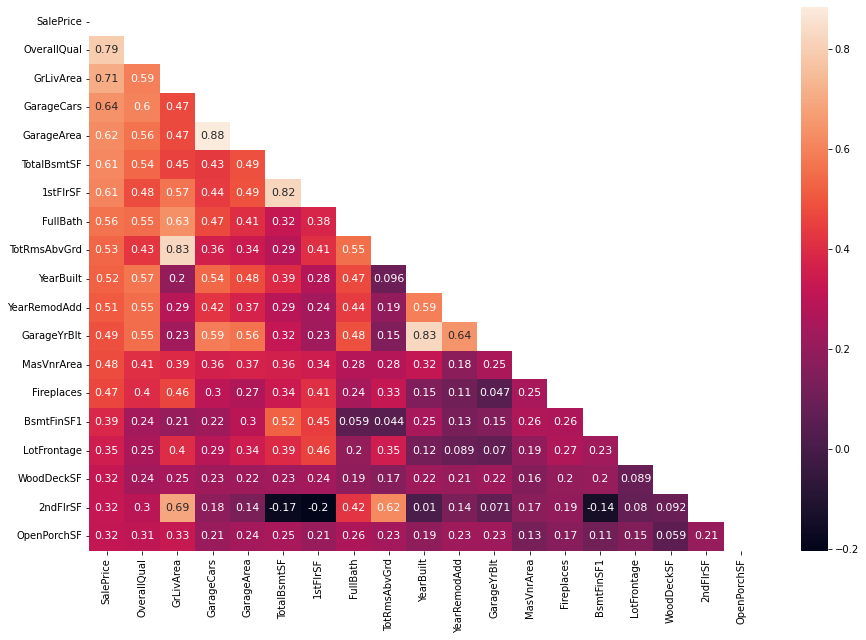

In [14]:
corr_matrix = train[corr_list.index].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(15,10 ))
hm = sns.heatmap(corr_matrix,mask =mask, cbar=True, annot=True, annot_kws={'size': 11}, 
                 yticklabels=corr_list.index, xticklabels=corr_list.index)
plt.show()

As can be seen from the figure, there are several pairs of features that are highly correlated(>0.8).

GarageArea(Size of garage in square feet) vs. GarageCar(Size of garage in car capacity): Both of these are essentially describing garage size. GarageCar can be removed.

TotalBsmtSF(Total square feet of basement area) vs. 1stFlrSF(First Floor square feet): Both of these are descriptions of the area of the house, which can be combined as a new feature by summing them up.

GarageYrBlt(Year garage was built) vs. YearBuilt(Original construction date): Both are descriptions of the construction time, GarageYrBlt can be removed.

TotRmsAbvGrd(Total rooms above grade) vs. GrLivArea(Above grade living area square feet): Both describe the size of the above-ground buildings, similar to GarageArea and GarageCar. TotRmsAbvGrd can be removed and we keep area as a feature.

In [15]:
full_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_train
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,NA,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,NA,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,FV,62.0,1936,Pave,Pave,Reg,Lvl,AllPub,...,NA,NA,NA,0,6,2006,WD,Normal,NaN,0
1455,2916,160,RL,62.0,1894,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,4,2006,WD,Normal,NaN,0
1456,2917,20,RL,85.0,20000,Pave,NA,Reg,Lvl,AllPub,...,NA,MnPrv,NA,0,9,2006,WD,Normal,NaN,0
1457,2918,85,RL,66.0,10441,Pave,NA,Reg,Lvl,AllPub,...,NA,GdPrv,Shed,700,7,2006,WD,Normal,NaN,0


In [16]:
full_df['1st&BsmtSF']=full_df['TotalBsmtSF']+full_df['1stFlrSF']
columns_to_drop = [
    "GarageCars",
    "GarageYrBlt",
    "TotRmsAbvGrd",
    "TotalBsmtSF",
    "1stFlrSF"
]
full_df.drop(columns_to_drop, axis=1, inplace=True)
new_cont_feats = full_df.drop(columns=['Id', 'SalePrice','is_train']).select_dtypes(include=np.number).columns.tolist()
len(new_cont_feats)

32

# Categorical Feature

In [17]:
full_df[cat_feats].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,...,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NA,NA,NA,WD,Normal
freq,2301,2907,2737,1849,2621,2917,2103,2763,450,2519,...,1739,1210,2621,2651,2679,2905,2357,2811,2533,2395


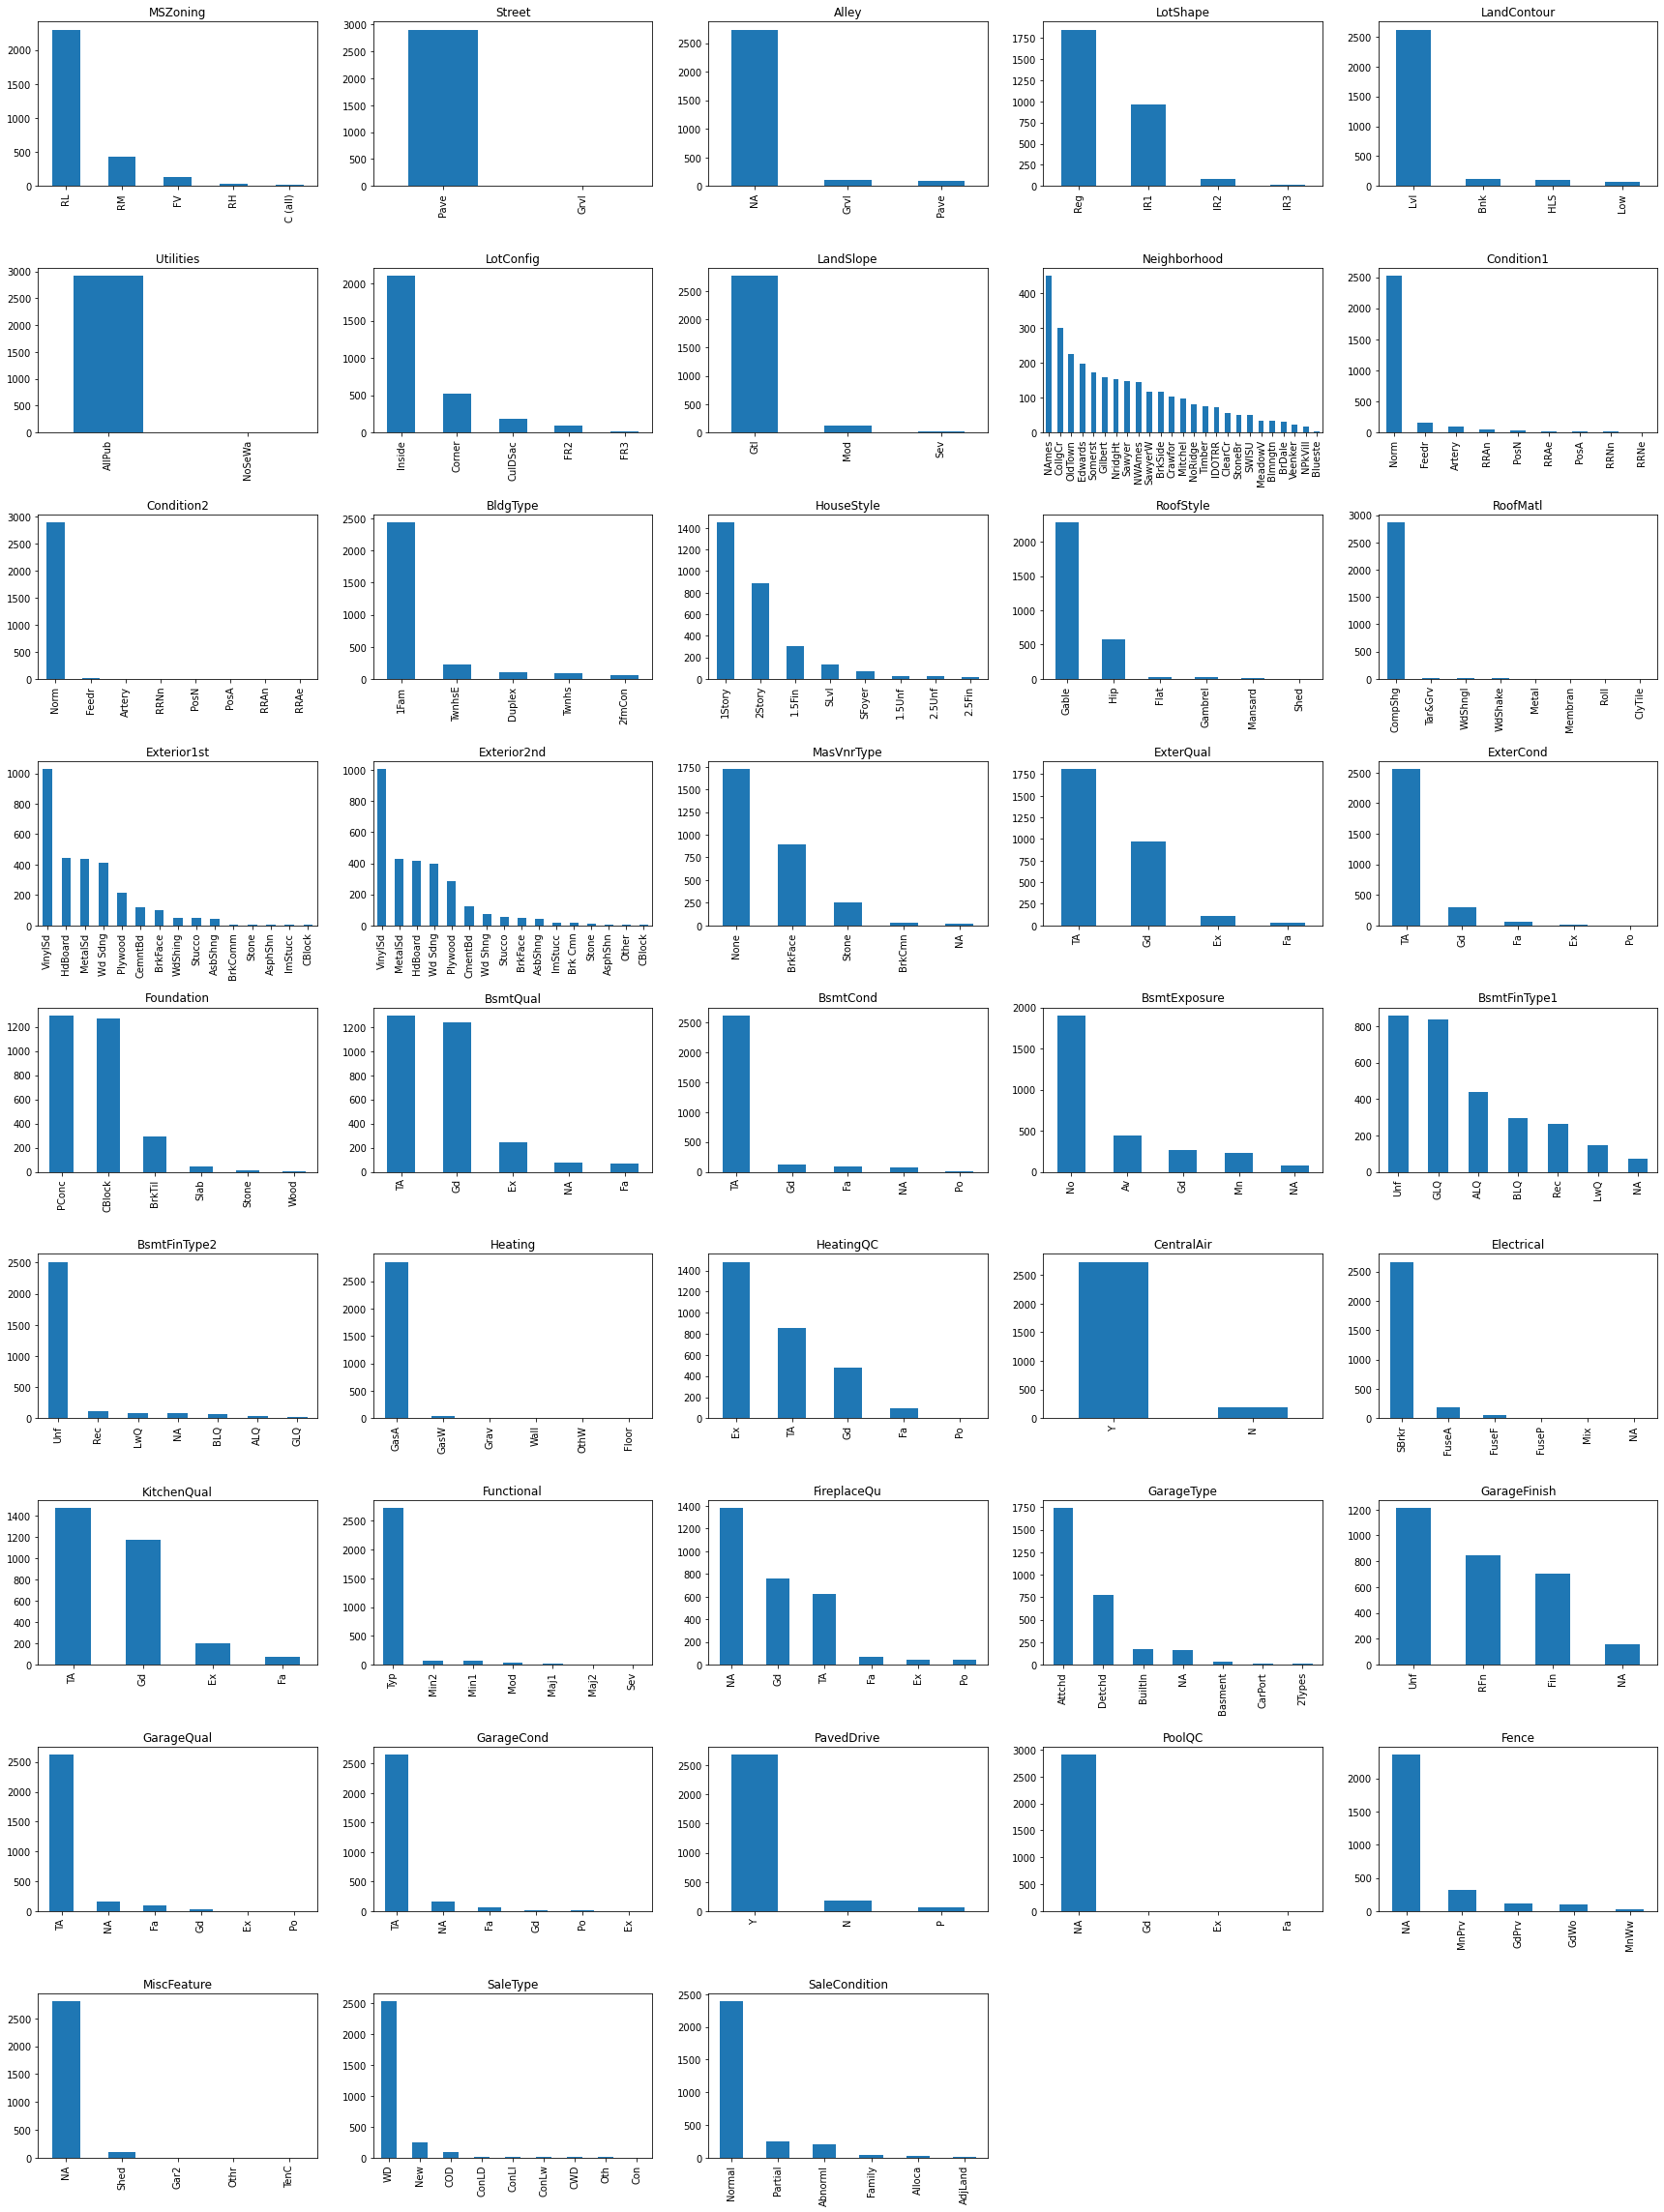

In [18]:
fig = plt.figure(figsize=(30, 50))
plt.subplots_adjust(hspace=0.5)
for i in range(0,len(cat_feats)):
    ax1 = fig.add_subplot(11,5,i+1)
    ax1.set_title(cat_feats[i])
    ax1=full_df[cat_feats[i]].value_counts().plot(kind="bar")
plt.show()

In [19]:
columns_to_drop = [
    "Street",
    "Alley",
    "LandContour",
    "Utilities",
    "LandSlope",
    "Condition2",
    "RoofMatl",
    "CentralAir",
    "GarageQual",
    "GarageCond",
    "SaleType",
    "PavedDrive",
    "LandContour",
    "ExterCond",
    "GarageCond",
    "Heating",
    "MiscFeature",
    "BsmtFinType2",
    "Functional",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Electrical"
]

full_df.drop(columns_to_drop, axis=1, inplace=True)
new_cat_feats = full_df.drop(columns=['Id', 'SalePrice']).select_dtypes(include='object').columns.tolist()
len(new_cat_feats)

24

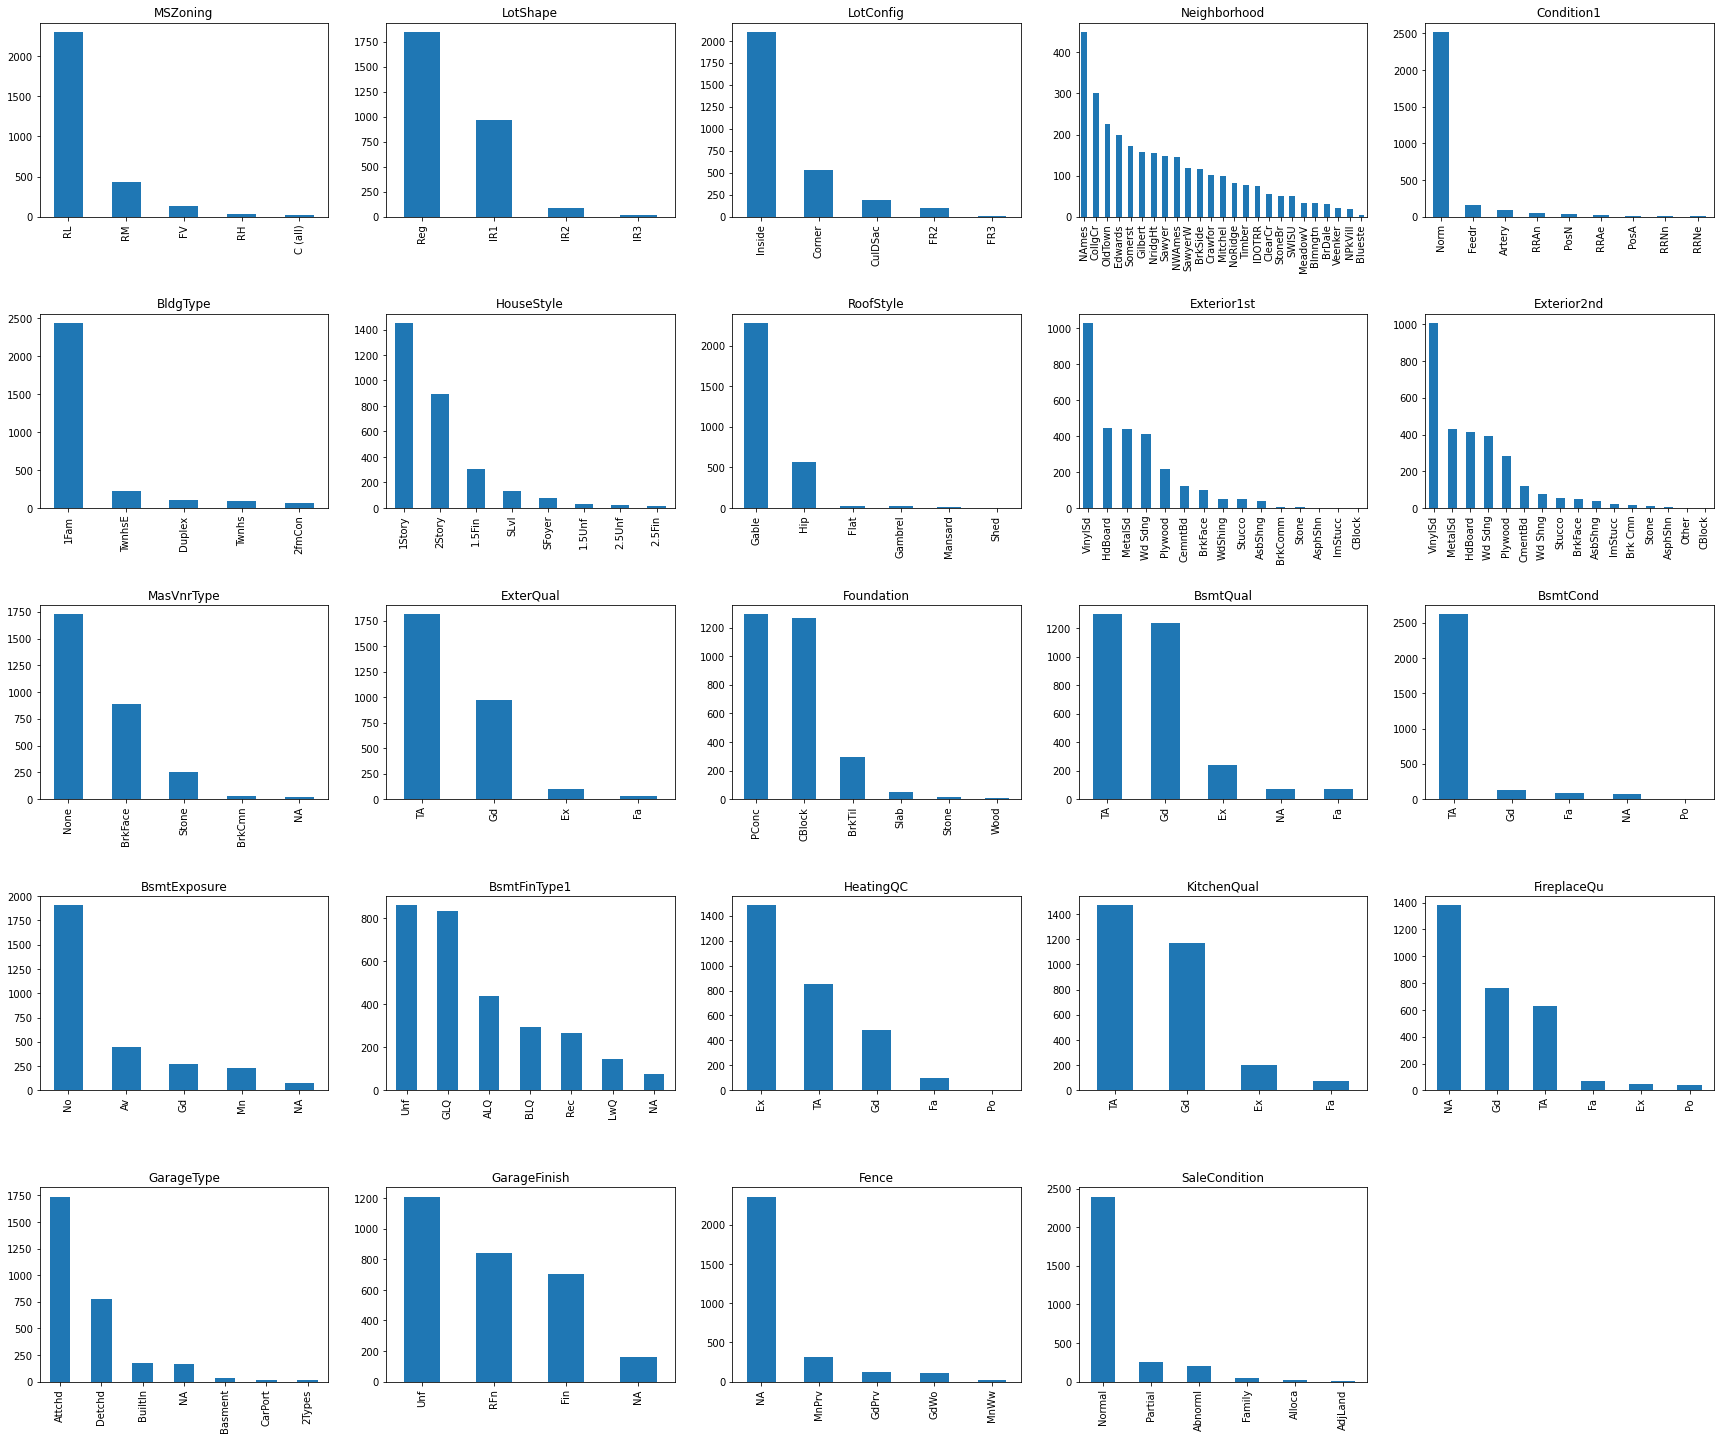

In [20]:

fig = plt.figure(figsize=(30, 25))
plt.subplots_adjust(hspace=0.5)
for i in range(0,len(new_cat_feats)):
    ax1 = fig.add_subplot(5,5,i+1)
    ax1.set_title(new_cat_feats [i])
    ax1=full_df[new_cat_feats [i]].value_counts().plot(kind="bar")
plt.show()

In [21]:
import category_encoders as ce 
encoder= ce.BaseNEncoder(cols=new_cat_feats,return_df=True,base=2)
full_df=encoder.fit_transform(full_df) 
full_df

,Id,MSSubClass,MSZoning_0,MSZoning_1,MSZoning_2,LotFrontage,LotArea,LotShape_0,LotShape_1,LotShape_2,...,Fence_2,MiscVal,MoSold,YrSold,SaleCondition_0,SaleCondition_1,SaleCondition_2,SalePrice,is_train,1st&BsmtSF
0,1,60,0,0,1,65.0,8450,0,0,1,...,1,0,2,2008,0,0,1,208500.0,1,1712
1,2,20,0,0,1,80.0,9600,0,0,1,...,1,0,5,2007,0,0,1,181500.0,1,2524
2,3,60,0,0,1,68.0,11250,0,1,0,...,1,0,9,2008,0,0,1,223500.0,1,1840
3,4,70,0,0,1,60.0,9550,0,1,0,...,1,0,2,2006,0,1,0,140000.0,1,1717
4,5,60,0,0,1,84.0,14260,0,1,0,...,1,0,12,2008,0,0,1,250000.0,1,2290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1,0,0,62.0,1936,0,0,1,...,1,0,6,2006,0,0,1,NaN,0,1767
1455,2916,160,0,0,1,62.0,1894,0,0,1,...,1,0,4,2006,0,0,1,NaN,0,1499
1456,2917,20,0,0,1,85.0,20000,0,0,1,...,0,0,9,2006,0,0,1,NaN,0,2766
1457,2918,85,0,0,1,66.0,10441,0,0,1,...,0,700,7,2006,0,0,1,NaN,0,2122


In [22]:
# Types of features
# Define feature types.
target = ['SalePrice']
cat_feats = full_df.drop(columns=['Id', 'SalePrice','is_train']).select_dtypes(include='object').columns.tolist()
cont_feats = full_df.drop(columns=['Id', 'SalePrice','is_train']).select_dtypes(include=np.number).columns.tolist()
all_feats = cat_feats + cont_feats
len(full_df.columns), len(cat_feats), len(cont_feats)

(114, 0, 111)

In [23]:
train = full_df[full_df['is_train']==1].drop(["is_train"],axis=1)
test = full_df[full_df['is_train']==0].drop(["is_train"],axis=1)
train

,Id,MSSubClass,MSZoning_0,MSZoning_1,MSZoning_2,LotFrontage,LotArea,LotShape_0,LotShape_1,LotShape_2,...,Fence_1,Fence_2,MiscVal,MoSold,YrSold,SaleCondition_0,SaleCondition_1,SaleCondition_2,SalePrice,1st&BsmtSF
0,1,60,0,0,1,65.0,8450,0,0,1,...,0,1,0,2,2008,0,0,1,208500.0,1712
1,2,20,0,0,1,80.0,9600,0,0,1,...,0,1,0,5,2007,0,0,1,181500.0,2524
2,3,60,0,0,1,68.0,11250,0,1,0,...,0,1,0,9,2008,0,0,1,223500.0,1840
3,4,70,0,0,1,60.0,9550,0,1,0,...,0,1,0,2,2006,0,1,0,140000.0,1717
4,5,60,0,0,1,84.0,14260,0,1,0,...,0,1,0,12,2008,0,0,1,250000.0,2290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,0,1,62.0,7917,0,0,1,...,0,1,0,8,2007,0,0,1,175000.0,1906
1456,1457,20,0,0,1,85.0,13175,0,0,1,...,1,0,0,2,2010,0,0,1,210000.0,3615
1457,1458,70,0,0,1,66.0,9042,0,0,1,...,0,0,2500,5,2010,0,0,1,266500.0,2340
1458,1459,20,0,0,1,68.0,9717,0,0,1,...,0,1,0,4,2010,0,0,1,142125.0,2156


In [24]:
test

,Id,MSSubClass,MSZoning_0,MSZoning_1,MSZoning_2,LotFrontage,LotArea,LotShape_0,LotShape_1,LotShape_2,...,Fence_1,Fence_2,MiscVal,MoSold,YrSold,SaleCondition_0,SaleCondition_1,SaleCondition_2,SalePrice,1st&BsmtSF
0,1461,20,0,0,1,65.0,11622,0,0,1,...,0,1,0,6,2010,0,0,1,NaN,1752
1,1462,20,0,0,1,80.0,14267,0,0,1,...,0,1,12500,6,2010,0,0,1,NaN,2591
2,1463,60,0,0,1,68.0,13830,0,1,0,...,0,1,0,3,2010,0,0,1,NaN,1848
3,1464,60,0,0,1,60.0,9978,0,1,0,...,0,1,0,6,2010,0,1,0,NaN,1682
4,1465,120,0,0,1,84.0,5005,0,1,0,...,0,1,0,1,2010,0,0,1,NaN,2425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1,0,0,62.0,1936,0,0,1,...,0,1,0,6,2006,0,0,1,NaN,1767
1455,2916,160,0,0,1,62.0,1894,0,0,1,...,0,1,0,4,2006,0,0,1,NaN,1499
1456,2917,20,0,0,1,85.0,20000,0,0,1,...,1,0,0,9,2006,0,0,1,NaN,2766
1457,2918,85,0,0,1,66.0,10441,0,0,1,...,0,0,700,7,2006,0,0,1,NaN,2122


In [25]:
x_train=train.drop(["SalePrice"],axis=1)
y_train=train["SalePrice"]

x_test=test.drop(["SalePrice"],axis=1)
# y_test=train["SalePrice"]

In [26]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train )
x_test= scale.fit_transform(x_test)

In [27]:
x_train

array([[-1.73086488,  0.07337496, -0.24235968, ..., -0.45015099,
         0.30599503, -0.6455083 ],
       [-1.7284922 , -0.87256276, -0.24235968, ..., -0.45015099,
         0.30599503,  0.38617437],
       [-1.72611953,  0.07337496, -0.24235968, ..., -0.45015099,
         0.30599503, -0.48287852],
       ...,
       [ 1.72611953,  0.30985939, -0.24235968, ..., -0.45015099,
         0.30599503,  0.15239406],
       [ 1.7284922 , -0.87256276, -0.24235968, ..., -0.45015099,
         0.30599503, -0.08138625],
       [ 1.73086488, -0.87256276, -0.24235968, ..., -0.45015099,
         0.30599503,  0.37092782]])

In [28]:
y_train

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [29]:
from keras import backend as K 
x_train = K.cast_to_floatx(x_train)
x_test = K.cast_to_floatx(x_test)

# Building a Neural Network

In [30]:
model = keras.Sequential([
  layers.Dense(256, activation='relu', input_dim=x_train.shape[1]),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(1, activation='linear')
])

In [31]:
model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.0001))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               28928     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 88,705
Trainable params: 88,705
Non-trainable params: 0
____________________________________________________

In [33]:
history = model.fit(
    x_train, 
    y_train, validation_split=0.1,
    epochs=500,batch_size=128
)

Epoch 1/500
11/11 [==============================] - 1s 19ms/step - loss: 39365971968.0000 - val_loss: 36096212992.0000
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 39365746688.0000 - val_loss: 36095975424.0000
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 39365451776.0000 - val_loss: 36095631360.0000
Epoch 4/500
11/11 [==============================] - 0s 4ms/step - loss: 39365017600.0000 - val_loss: 36095127552.0000
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 39364374528.0000 - val_loss: 36094377984.0000
Epoch 6/500
11/11 [==============================] - 0s 4ms/step - loss: 39363416064.0000 - val_loss: 36093243392.0000
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 39361986560.0000 - val_loss: 36091547648.0000
Epoch 8/500
11/11 [==============================] - 0s 4ms/step - loss: 39359836160.0000 - val_loss: 36089028608.0000
Epoch 9/500
11/11 [============================

Epoch 70/500
11/11 [==============================] - 0s 4ms/step - loss: 2875616256.0000 - val_loss: 2975073536.0000
Epoch 71/500
11/11 [==============================] - 0s 4ms/step - loss: 2824034304.0000 - val_loss: 2906997504.0000
Epoch 72/500
11/11 [==============================] - 0s 4ms/step - loss: 2776165632.0000 - val_loss: 2845891840.0000
Epoch 73/500
11/11 [==============================] - 0s 4ms/step - loss: 2733219072.0000 - val_loss: 2790192128.0000
Epoch 74/500
11/11 [==============================] - 0s 4ms/step - loss: 2689984000.0000 - val_loss: 2736002304.0000
Epoch 75/500
11/11 [==============================] - 0s 4ms/step - loss: 2653007360.0000 - val_loss: 2683389184.0000
Epoch 76/500
11/11 [==============================] - 0s 4ms/step - loss: 2612115456.0000 - val_loss: 2634497536.0000
Epoch 77/500
11/11 [==============================] - 0s 4ms/step - loss: 2573902848.0000 - val_loss: 2586908928.0000
Epoch 78/500
11/11 [==============================] - 0s

11/11 [==============================] - 0s 4ms/step - loss: 1401034624.0000 - val_loss: 1226066304.0000
Epoch 140/500
11/11 [==============================] - 0s 4ms/step - loss: 1390758272.0000 - val_loss: 1215389184.0000
Epoch 141/500
11/11 [==============================] - 0s 4ms/step - loss: 1380149760.0000 - val_loss: 1205185536.0000
Epoch 142/500
11/11 [==============================] - 0s 4ms/step - loss: 1369820544.0000 - val_loss: 1195391488.0000
Epoch 143/500
11/11 [==============================] - 0s 4ms/step - loss: 1359864448.0000 - val_loss: 1184929408.0000
Epoch 144/500
11/11 [==============================] - 0s 4ms/step - loss: 1349731456.0000 - val_loss: 1175225216.0000
Epoch 145/500
11/11 [==============================] - 0s 4ms/step - loss: 1341080960.0000 - val_loss: 1166087296.0000
Epoch 146/500
11/11 [==============================] - 0s 4ms/step - loss: 1331497728.0000 - val_loss: 1156914560.0000
Epoch 147/500
11/11 [==============================] - 0s 4ms/

11/11 [==============================] - 0s 4ms/step - loss: 924775296.0000 - val_loss: 831436288.0000
Epoch 209/500
11/11 [==============================] - 0s 4ms/step - loss: 918817536.0000 - val_loss: 831530560.0000
Epoch 210/500
11/11 [==============================] - 0s 4ms/step - loss: 914260800.0000 - val_loss: 829529408.0000
Epoch 211/500
11/11 [==============================] - 0s 4ms/step - loss: 911191424.0000 - val_loss: 825812288.0000
Epoch 212/500
11/11 [==============================] - 0s 4ms/step - loss: 906833216.0000 - val_loss: 826846016.0000
Epoch 213/500
11/11 [==============================] - 0s 4ms/step - loss: 901875904.0000 - val_loss: 823365952.0000
Epoch 214/500
11/11 [==============================] - 0s 4ms/step - loss: 897430016.0000 - val_loss: 820331072.0000
Epoch 215/500
11/11 [==============================] - 0s 4ms/step - loss: 893732096.0000 - val_loss: 817631104.0000
Epoch 216/500
11/11 [==============================] - 0s 4ms/step - loss: 889

11/11 [==============================] - 0s 4ms/step - loss: 693787584.0000 - val_loss: 743915648.0000
Epoch 279/500
11/11 [==============================] - 0s 4ms/step - loss: 691390976.0000 - val_loss: 741250752.0000
Epoch 280/500
11/11 [==============================] - 0s 4ms/step - loss: 689791168.0000 - val_loss: 745774912.0000
Epoch 281/500
11/11 [==============================] - 0s 4ms/step - loss: 685670080.0000 - val_loss: 740159104.0000
Epoch 282/500
11/11 [==============================] - 0s 4ms/step - loss: 682995776.0000 - val_loss: 737468288.0000
Epoch 283/500
11/11 [==============================] - 0s 4ms/step - loss: 681233344.0000 - val_loss: 736388608.0000
Epoch 284/500
11/11 [==============================] - 0s 4ms/step - loss: 678315136.0000 - val_loss: 739249792.0000
Epoch 285/500
11/11 [==============================] - 0s 4ms/step - loss: 677517696.0000 - val_loss: 741950592.0000
Epoch 286/500
11/11 [==============================] - 0s 4ms/step - loss: 676

11/11 [==============================] - 0s 4ms/step - loss: 558303040.0000 - val_loss: 712386112.0000
Epoch 349/500
11/11 [==============================] - 0s 4ms/step - loss: 560892608.0000 - val_loss: 714564800.0000
Epoch 350/500
11/11 [==============================] - 0s 4ms/step - loss: 557257472.0000 - val_loss: 727712256.0000
Epoch 351/500
11/11 [==============================] - 0s 4ms/step - loss: 554891968.0000 - val_loss: 726487296.0000
Epoch 352/500
11/11 [==============================] - 0s 4ms/step - loss: 553524608.0000 - val_loss: 721020800.0000
Epoch 353/500
11/11 [==============================] - 0s 4ms/step - loss: 551742720.0000 - val_loss: 736530368.0000
Epoch 354/500
11/11 [==============================] - 0s 4ms/step - loss: 551457984.0000 - val_loss: 727128384.0000
Epoch 355/500
11/11 [==============================] - 0s 4ms/step - loss: 548691072.0000 - val_loss: 722992384.0000
Epoch 356/500
11/11 [==============================] - 0s 4ms/step - loss: 547

11/11 [==============================] - 0s 4ms/step - loss: 466619968.0000 - val_loss: 714116736.0000
Epoch 419/500
11/11 [==============================] - 0s 4ms/step - loss: 466886304.0000 - val_loss: 706953472.0000
Epoch 420/500
11/11 [==============================] - 0s 4ms/step - loss: 463239712.0000 - val_loss: 719806784.0000
Epoch 421/500
11/11 [==============================] - 0s 4ms/step - loss: 463711424.0000 - val_loss: 717867776.0000
Epoch 422/500
11/11 [==============================] - 0s 4ms/step - loss: 461770656.0000 - val_loss: 710438208.0000
Epoch 423/500
11/11 [==============================] - 0s 4ms/step - loss: 461021280.0000 - val_loss: 709076096.0000
Epoch 424/500
11/11 [==============================] - 0s 4ms/step - loss: 459973728.0000 - val_loss: 711112576.0000
Epoch 425/500
11/11 [==============================] - 0s 4ms/step - loss: 458811488.0000 - val_loss: 709083968.0000
Epoch 426/500
11/11 [==============================] - 0s 4ms/step - loss: 457

11/11 [==============================] - 0s 4ms/step - loss: 397257088.0000 - val_loss: 711774080.0000
Epoch 489/500
11/11 [==============================] - 0s 4ms/step - loss: 397077408.0000 - val_loss: 709073344.0000
Epoch 490/500
11/11 [==============================] - 0s 4ms/step - loss: 395981024.0000 - val_loss: 712928576.0000
Epoch 491/500
11/11 [==============================] - 0s 4ms/step - loss: 395021280.0000 - val_loss: 717635392.0000
Epoch 492/500
11/11 [==============================] - 0s 4ms/step - loss: 394116384.0000 - val_loss: 712079360.0000
Epoch 493/500
11/11 [==============================] - 0s 4ms/step - loss: 393511232.0000 - val_loss: 719883456.0000
Epoch 494/500
11/11 [==============================] - 0s 4ms/step - loss: 392500384.0000 - val_loss: 710264256.0000
Epoch 495/500
11/11 [==============================] - 0s 4ms/step - loss: 392077536.0000 - val_loss: 710051648.0000
Epoch 496/500
11/11 [==============================] - 0s 4ms/step - loss: 392

<AxesSubplot:>

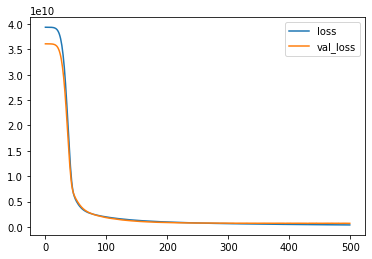

In [34]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [35]:
preds_val = model.predict(x_test)

In [36]:
preds_val[0:5]

array([[116828.38],
       [167152.6 ],
       [200790.53],
       [157648.1 ],
       [186418.78]], dtype=float32)

In [37]:
preds_test = model.predict(x_test).ravel()

In [38]:
df_preds = pd.DataFrame({'Id':test.Id , 'SalePrice': preds_test})
df_preds.to_csv('pred.csv' ,index=False)